# Importing the Necessary Libraries

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import pandas as pd

import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from math import sqrt

%matplotlib inline

# Creating a Pandas DataFrame from a CSV file

In [321]:
file_name = '../original/D31.csv'
#file_name = '../original/g2-2-50.csv'
#file_name = '../original/g2-2-30.csv'

#file_name = 'noised/g2-2-30.csv'
#file_name = 'evaluation.csv'

#file_name = '../gaussian100.csv'
#file_name = '../CE3/iris.csv'
#file_name = '../CE3/wine.csv'
#file_name = '../CE3/wdbc.csv'
#file_name = '../CE3/glass.csv'

# To get file in "result" folder use "HDBSCAN.py" 
#file_name = '../result2/t4.8k.csv'
#file_name = '../result2/t5.8k.csv'
#file_name = '../result2/t8.8k.csv'
#file_name = '../result2/t7.10k.csv'

#file_name = '../result2/g2-2-30.csv'
#file_name = '../result2/varying_densities.csv'


In [322]:
# Overlapped Datasets
#file_name = '../BS3WC-Datasets/overlapped/scene.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-beach.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-sunset.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-fall.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-field.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-mountain.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-urban.csv'

#file_name = '../BS3WC-Datasets/overlapped/birds.csv'

# Systhetic Datasets
#file_name = '../BS3WC-Datasets/Synthetic/a3.txt'
#file_name = '../BS3WC-Datasets/Synthetic/Aggregation.txt'
#file_name = '../BS3WC-Datasets/Synthetic/Compound.txt'
#file_name = '../BS3WC-Datasets/Synthetic/dim128.txt'
#file_name = '../BS3WC-Datasets/Synthetic/dim512.txt'
#file_name = '../BS3WC-Datasets/Synthetic/flame.txt'
#file_name = '../BS3WC-Datasets/Synthetic/jain.txt'
#file_name = '../BS3WC-Datasets/Synthetic/pathbased.txt'
#file_name = '../BS3WC-Datasets/Synthetic/R15.txt'
#file_name = '../BS3WC-Datasets/Synthetic/s1.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/s2.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/spiral.txt'
#file_name = '../BS3WC-Datasets/Synthetic/unbalance.txt'
#dataset_clusters = 8

# Real Datasets
#file_name = '../BS3WC-Datasets/Real/CNAE-9.data'
#file_name = '../BS3WC-Datasets/Real/dermatology.data'
#file_name = '../BS3WC-Datasets/Real/ecoli.data'
#file_name = '../BS3WC-Datasets/Real/glass.data'
#file_name = '../BS3WC-Datasets/Real/iris.data'
#file_name = '../BS3WC-Datasets/Real/seeds_dataset.data'
#file_name = '../BS3WC-Datasets/Real/segmentation.data'
#file_name = '../BS3WC-Datasets/Real/thyroid0387.data'
#file_name = '../BS3WC-Datasets/Real/waveform.data'
#file_name = '../BS3WC-Datasets/Real/waveform2.data'
#file_name = '../BS3WC-Datasets/Real/wdbc.data'
#file_name = '../BS3WC-Datasets/Real/wine.data'
#file_name = '../BS3WC-Datasets/Real/yeast.data'


In [323]:
data = pd.read_csv(file_name)

In [324]:
folder_name = '../images-visual'
#folder_name = '../images-visual'
split_arr = file_name.split('/')
if '.csv' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.csv','').lower()
if '.txt' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.txt','').lower()
    
new_file_name = identity_name
identity_name = identity_name.replace('.','-')
identity_name = identity_name.replace('_','-')
identity_name = identity_name.replace(' ','-')
print(identity_name)

file_measures = "../Measurements/" + identity_name + "-measures.txt"
open(file_measures,"w+")

d31


<_io.TextIOWrapper name='../Measurements/d31-measures.txt' mode='w+' encoding='UTF-8'>

In [325]:
from sklearn.metrics.cluster import normalized_mutual_info_score
    
def calculate_NMI(inside_points, labels, ground_truth, file_name, caption):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    nmi = normalized_mutual_info_score(X, Y)
    print("Normalized Mutual Information (" + caption + "): %0.4f"% nmi)
    file.write("Normalized Mutual Information (" + caption + "): %0.4f\n"% nmi)


In [326]:
#calculate_NMI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [327]:
from sklearn.metrics.cluster import adjusted_rand_score

def calculate_ARI(inside_points, labels, ground_truth, file_name, caption, no_outliers=False):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    ari = adjusted_rand_score(X, Y)
    
    print("Adjusted Random Index (" + caption + "): %0.4f"% ari)
    file.write("Adjusted Random Index (" + caption + "): %0.4f\n"% ari)


In [328]:
#calculate_ARI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [329]:
def calculate_db_index(inside_points, labels, file_name, caption):
    from sklearn.metrics import davies_bouldin_score 
    import sklearn
    file = open(file_name, "a+")
    
    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    db_index = davies_bouldin_score(X, Y)
    print("DB Index Score (" + caption + "): %0.4f\n"% db_index)
    file.write("DB Index Score (" + caption + "): %0.4f\n"% db_index)

In [330]:
#calculate_db_index(final_inside, clusters_labels, file_measures)

In [331]:
def calculate_silhouette_score(inside_points, labels, file_name, caption):
    file = open(file_name, "a+")

    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    #X = np.array(X)
    #Y = np.array(Y)
    
    silhouette_coef = metrics.silhouette_score(X, Y)
    print("Silhouette Coefficient (" + caption + "): %0.4f"% silhouette_coef)
    file.write("Silhouette Coefficient (" + caption + "): %0.4f\n"% silhouette_coef)


In [332]:
def calculate_accuracy(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")

    X = []
    Y = []
    
    correct = 0
    #total = len(dataset)
    #for index, o_c in dataset.iterrows():
    #    key = tuple(o_c[features])
    #    if key in labels:
    #        if labels[key] == o_c['L']:
    #            correct += 1

    total = len(inside_points)
    for f in inside_points:
        if labels[f] == ground_truth[f]:
            correct += 1
    
    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)
        
    print("Accuracy Score (" + caption + "): %0.4f"% accuracy)
    file.write("Accuracy Score (" + caption + "): %0.4f\n"% accuracy)

#calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures)

In [333]:
def calculate_confusion_matrix(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")
    
    unique_labels = np.unique(dataset['L'])
    confusion_matrices = {}
    
    print("length: ", len(inside_points))
    X = []
    Y = []
    
    for lab in unique_labels:
        confusion_matrices[lab] = [0,0,0,0]

    correct = 0
    total = len(dataset)
    for index, o_c in dataset.iterrows():
        key = tuple(o_c[features])
        if key in labels:
            if labels[key] == o_c['L']:
                confusion_matrices[o_c['L']][0] += 1
            
                for lab in unique_labels:
                    if lab != o_c['L']:
                        confusion_matrices[lab][3] += 1
            else:
                if labels[key] == -1:
                    #continue # To check confusion matrix for other than outliers                    
                    for lab in unique_labels:
                        confusion_matrices[lab][2] += 1
                else:
                    confusion_matrices[labels[key]][1] += 1
            
                    for lab in unique_labels:
                        if lab != labels[key]:
                            confusion_matrices[lab][2] += 1

    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)*100

    print("Confusion Matrices (" + caption + "): " + str(confusion_matrices) )
    file.write("Confusion Matrices (" + caption + "): " + str(confusion_matrices) + "\n")

#calculate_confusion_matrix(final_inside, clusters_labels, sampled_df, file_measures)

# Data Description


In [334]:
def write_outliers_detected(final_inside,final_partial,final_outside,file_name, caption):
    file = open(file_name, "a+")
    file.write("Total Objects (" + caption + "): %0.4f\n"% (len(final_inside)+len(final_partial)+len(final_outside)))
    file.write("Outliers Detected By BS3 (" + caption + "): %0.4f\n"% (len(final_outside)+len(final_partial)))

In [335]:
data.head()

Col1    Col2  L
0  25.0514  5.7475  1
1  26.6614  7.3414  1
2  25.2653  6.2466  1
3  25.2285  4.7447  1
4  25.7529  5.1564  1

In [336]:
data.shape

(3100, 3)

# Data Sampling

In [337]:
#sampled_df = data[(data['Col1']/data['Col1']) == 1]
sampled_df = data
sampled_df.shape

(3100, 3)

In [338]:
sampled_df.head()

Col1    Col2  L
0  25.0514  5.7475  1
1  26.6614  7.3414  1
2  25.2653  6.2466  1
3  25.2285  4.7447  1
4  25.7529  5.1564  1

In [339]:
import csv

def write_to_file(file_name, values, header_names=False):
    with open(file_name, 'w') as writeFile:
        writer = csv.writer(writeFile)
        if header_names:
            writer.writerow(header_names)
        writer.writerows(values)
        

# Statistics


In [340]:
sampled_df.describe().transpose()


count       mean       std     min        25%       50%        75%  \
Col1  3100.0  16.739989  7.325422  2.9070  10.442950  16.48390  23.394825   
Col2  3100.0  17.127637  6.750086  3.7925  10.969075  16.87145  22.358100   
L     3100.0  16.000000  8.945715  1.0000   8.000000  16.00000  24.000000   

          max  
Col1  29.5939  
Col2  29.8538  
L     31.0000

# Select Features of Interest for Clustering


In [341]:
print(file_name)

#IRIS Dataset -OR- Four Featured datasets
if 'iris' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4']

#WINE Dataset -OR- Thirteen Featured datasets
elif 'wine' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 
                'Col11', 'Col12', 'Col13']

#WDBC Dataset -OR- Thirty Featured datasets
elif 'wdbc' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30']

elif 'dermatology' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30',
                'Col31', 'Col32', 'Col33', 'Col34']

#GLASS Dataset -OR- Nine Featured datasets
elif 'glass' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9']

elif 'scene' in file_name:
    features = ['Col'+str(i+1) for i in range(294)]

#Other Dataset -OR- Two Featured datasets
else:
    features = ['Col1', 'Col2']

select_df_test_flag = False
if 'Out' in sampled_df:
    select_df = sampled_df[sampled_df['Out'] == 1][features]
    select_df_test = sampled_df[sampled_df['Out'] != 1][features]
    select_df_test_out = sampled_df[sampled_df['Out'] == 3][features]
    select_df_test_flag = True
else:
    select_df = sampled_df[features]

#X = StandardScaler().fit_transform(select_df)
print(features)

../original/D31.csv
['Col1', 'Col2']


In [342]:
print(select_df.shape)
if select_df_test_flag:
    print(select_df_test.shape)

(3100, 2)


In [343]:
select_df.head()

Col1    Col2
0  25.0514  5.7475
1  26.6614  7.3414
2  25.2653  6.2466
3  25.2285  4.7447
4  25.7529  5.1564

In [344]:
num_of_clusters = 0

In [345]:
label_col_name = 'L'
#sampled_df.drop('L', axis=1, inplace=True)
sampled_df

Col1     Col2   L
0     25.0514   5.7475   1
1     26.6614   7.3414   1
2     25.2653   6.2466   1
3     25.2285   4.7447   1
4     25.7529   5.1564   1
...       ...      ...  ..
3095   5.1380  16.6150  31
3096   5.7360  16.9991  31
3097   5.2760  17.2475  31
3098   6.4444  16.2033  31
3099   7.1620  18.1836  31

[3100 rows x 3 columns]

In [346]:
if 'L' in sampled_df:
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    clusters_labels = np.unique(sampled_df['L'])
    print(clusters_labels)
    num_of_clusters = len(clusters_labels)

else:    
    num_of_clusters = dataset_clusters
    #X = StandardScaler().fit_transform(select_df)
    kmeans = KMeans(n_clusters=num_of_clusters)
    model = kmeans.fit_predict(select_df)
    centroids = np.unique(kmeans.cluster_centers_)
    clusters_labels = kmeans.labels_
    
    print("Centroids: ", centroids)
    print("model\n", model)
    #plt.scatter(X[:, 0], X[:, 1], c=model)
    plt.scatter(select_df['Col1'], select_df['Col2'], c=model)
    plt.title("KMean Clusters")
    plt.show()

    sampled_df['L'] = kmeans.labels_
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


/home/baharali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/baharali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/baharali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/baharali/anaconda3/lib/python3.6/site-packages/ipykernel_l

In [347]:
sampled_df

Col1     Col2   L
0     25.0514   5.7475   0
1     26.6614   7.3414   0
2     25.2653   6.2466   0
3     25.2285   4.7447   0
4     25.7529   5.1564   0
...       ...      ...  ..
3095   5.1380  16.6150  30
3096   5.7360  16.9991  30
3097   5.2760  17.2475  30
3098   6.4444  16.2033  30
3099   7.1620  18.1836  30

[3100 rows x 3 columns]

In [348]:
sampled_df.head()

Col1    Col2  L
0  25.0514  5.7475  0
1  26.6614  7.3414  0
2  25.2653  6.2466  0
3  25.2285  4.7447  0
4  25.7529  5.1564  0

In [349]:
def plot_custom_clusters(final_list, clusters_labels, size, colors, description, image_name, alpha=1, beta=0, not_outlier=False):
    final_list = np.array(final_list)    
    if len(final_list) > 0:
        for obj in final_list:
            if not_outlier and clusters_labels[tuple(obj)] -1:
                continue
            
            col = colors[clusters_labels[tuple(obj)]]
            plt.plot(obj[0], obj[1], '.', color=col)
        #plt.title(str(description))
        
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show

In [350]:
sigma_multiples = 4

In [351]:
sampled_df.shape


(3100, 3)

In [352]:
sampled_df.describe().transpose()


count       mean       std     min        25%       50%        75%  \
Col1  3100.0  16.739989  7.325422  2.9070  10.442950  16.48390  23.394825   
Col2  3100.0  17.127637  6.750086  3.7925  10.969075  16.87145  22.358100   
L     3100.0  15.000000  8.945715  0.0000   7.000000  15.00000  23.000000   

          max  
Col1  29.5939  
Col2  29.8538  
L     30.0000

In [353]:
print(len(sampled_df[sampled_df.L == 0]))
print(len(sampled_df[sampled_df.L == 1]))

100
100



# From Here Started Our Method

In [354]:
label_col_name = 'L'
num_neighbors = 7

In [355]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors, return_distance=False)  



In [356]:
knn.shape

(3100, 7)

In [357]:
row_neighbors_list = {}
for i in range(knn.shape[0]):
    row_neighbors_list[i] = knn[i]

In [358]:
for index in row_neighbors_list:
    #print((row_neighbors_list[index]))
    mylist = row_neighbors_list[index]
    #print("______________")

In [359]:
def getClustersInside(dataset, c_k_o_i, alpha = 1.0):
    cluster_inside = {}
    cluster_inside = set(cluster_inside)
    dataset['Col2'][0]
    
    clusters_labels = {}
    
    final_list = []
    my_dict = {}
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            if c_k_o_i[i][j] >= alpha:
                #obj = [dataset['Col1'][i], dataset['Col2'][i], j]
                obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_list:
                    final_list.append(obj)
                cluster_inside.add(obj)
                clusters_labels[obj] = j
                
                # Try to keep Maximum Valued Record in a dictionay
                key = (dataset['Col1'][i], dataset['Col2'][i])
                if key in my_dict:
                    if my_dict[key] < c_k_o_i[i][j]:
                        my_dict[key] = c_k_o_i[i][j]
                else:
                    my_dict[key] = c_k_o_i[i][j]

    return clusters_labels, final_list, cluster_inside, my_dict


In [360]:
def getClustersIn_Out_Part(dataset, c_k_o_i, alpha = 1.0, beta = 0.0, not_outlier=False):
    cluster_inside = {}
    cluster_outside = {}
    cluster_partial = {}

    cluster_inside = set(cluster_inside)
    cluster_outside = set(cluster_outside)
    cluster_partial = set(cluster_partial)
    
    clusters_labels = {}
    
    final_inside = []
    final_outside = []
    final_partial = []
    
    dict_inside = {}
    dict_outside = {}
    dict_partial = {}
    
    outliers_indices = []
    
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            
            obj = [] 
            for col in features:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                obj.append(dataset[col][i])
            obj = tuple(obj)
            
            if c_k_o_i[i][j] >= alpha:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                #print(c_k_o_i[i][j])
                if obj not in final_inside:
                    final_inside.append(obj)
                
                # Remove from partial as well as outside
                if obj in final_partial:
                    #print("Removed... " + str(obj))
                    final_partial.remove(obj)
                    
                #For outliers
                if i in outliers_indices:
                    outliers_indices.remove(i)
                
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Inside 
                #cluster_inside.add(obj)
                clusters_labels[obj] = j

                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_inside:
                    if dict_inside[key] < c_k_o_i[i][j]:
                        dict_inside[key] = c_k_o_i[i][j]
                else:
                    dict_inside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] <= beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_outside and obj not in final_inside and obj not in final_partial:
                    final_outside.append(obj)
                    
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1
                
                #Cluster outside 
                #cluster_outside.add(obj)
                
                # Try to keep Maximum Valued Record in a dictionay
                key = obj
                if key in dict_outside:
                    if dict_outside[key] < c_k_o_i[i][j]:
                        dict_outside[key] = c_k_o_i[i][j]
                else:
                    dict_outside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] < alpha and c_k_o_i[i][j] > beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_partial and obj not in final_inside:
                    final_partial.append(obj)
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1

                # Remove from outside
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Partial
                #cluster_partial.add(tuple(obj)) 
 
                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_partial:
                    if dict_partial[key] < c_k_o_i[i][j]:
                        dict_partial[key] = c_k_o_i[i][j]
                else:
                    dict_partial[key] = c_k_o_i[i][j]

            
    #return cluster_inside, cluster_outside, cluster_partial, final_inside, final_outside, final_partial, dict_inside, dict_outside, dict_partial
    return clusters_labels, final_inside, final_outside, final_partial, outliers_indices


In [361]:
def getClusters_Centroids_MeanDistance(dataset, features_set, label_col_name, knn):
    import math
    
    clusters_labels = np.unique(dataset[label_col_name])        
    clusters_centroids = {}
        
    for i in range(len(clusters_labels)):
        # Get all records of specific cluster
        cluster_dataset = dataset[features_set].loc[dataset[label_col_name] == clusters_labels[i]]
        
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroid = sum_of_cluster/len(cluster_dataset)
        average_distance = 0
        total_distance = 0
        centroid_distances_all = np.zeros(len(cluster_dataset))
        #print("centroid: ", centroid)
        total_average_distances_list = np.zeros(len(cluster_dataset))
        neighbor_distance_list = np.zeros(knn.shape[1])
        j = 0
        for index, o_c in cluster_dataset.iterrows():                                                              
            
            #print("o_c: ", o_c)
            
            centroid_distance = 0
            for col in features_set:
                if col != label_col_name:
                    centroid_distance += (o_c[col] - centroid[col])**2
                    #print(col, ":", (o_c[col] - centroid[col])**2)

            #print("index: ", index)
            for k in range(knn.shape[1]):
                neighbor_distance = 0
                for col in features_set:
                    #print(dataset.iloc[knn[index][k]][col])
                    if col != label_col_name:
                        neighbor_distance += (dataset.iloc[index][col] - dataset.iloc[knn[index][k]][col])**2
            
                neighbor_distance_list[k] =  math.sqrt(neighbor_distance)
                #print(dataset.iloc[knn[index][j]])
            
            centroid_distance = math.sqrt(centroid_distance)
            centroid_distances_all[j] = centroid_distance
            #print(centroid_distance)
            total_distance += centroid_distance
            total_average_distances_list[j] = np.mean(neighbor_distance_list)
            j += 1
        
        #print(total_average_distances_list)
        #print(total_distance)
        average_distance = total_distance/len(cluster_dataset)
        centroid_distance_std = np.std(centroid_distances_all)
        
        total_average_distance = np.sum(total_average_distances_list)
        average_distance_std = np.std(total_average_distances_list)
        average_distance_average = total_average_distance/len(cluster_dataset)
        clusters_centroids[clusters_labels[i]] = (centroid,average_distance,average_distance_average, average_distance_std,centroid_distance_std)
    return clusters_centroids

In [362]:
sampled_df.shape
#print(sampled_df)


(3100, 3)

In [363]:
if select_df_test_flag:
    clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df[sampled_df['Out'] == 1], features, label_col_name, knn)
else:
    clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [364]:
#clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [365]:
print("Centroid,  Average_distance, Average_distance_average,  Average_distance_std")
clusters_centroids

Centroid,  Average_distance, Average_distance_average,  Average_distance_std


{0: (Col1    25.542312
  Col2     6.020901
  dtype: float64,
  1.0169362475832577,
  0.28866332572448283,
  0.12041821804525896,
  0.5298067952624643),
 1: (Col1    17.544338
  Col2    11.604312
  dtype: float64,
  0.9146378881824022,
  0.2643848675470513,
  0.13482467283218508,
  0.5297760805408608),
 2: (Col1     8.378654
  Col2    10.298188
  dtype: float64,
  1.0055063032306557,
  0.2716374871369937,
  0.11817671148098531,
  0.4791522139189392),
 3: (Col1    24.825218
  Col2    24.361423
  dtype: float64,
  0.9246649966500563,
  0.264001442185015,
  0.13317627658560197,
  0.5371069450464698),
 4: (Col1     5.352406
  Col2    20.201413
  dtype: float64,
  1.0294281577617397,
  0.2770409295159476,
  0.12117540019800226,
  0.5128654621850359),
 5: (Col1    26.872264
  Col2    10.297452
  dtype: float64,
  0.9411907687141808,
  0.26513401188388847,
  0.17659739330605986,
  0.5486386248590318),
 6: (Col1    21.329816
  Col2    27.438064
  dtype: float64,
  0.9247452804577171,
  0.290291

In [366]:
def getEvaluationValues(dataset, dataset_neighbors, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    neighbor_averages_list = [] 
    for index in dataset_neighbors:
        for i in range(num_neighbors):
            dataset_index = dataset_neighbors[index][i]
            cluster_label = sampled_df.iloc[dataset_index]['L']
            c_k_o_i[index][int(cluster_label)] += 1
    
    
    return (c_k_o_i/num_neighbors)

In [367]:
#c_k_o_i = getEvaluationValues(sampled_df, row_neighbors_list, label_col_name)
if select_df_test_flag:
    c_k_o_i = getEvaluationValues(sampled_df[sampled_df['Out'] == 1], row_neighbors_list, label_col_name)
else:
    c_k_o_i = getEvaluationValues(sampled_df, row_neighbors_list, label_col_name)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


In [368]:
c_k_o_i.shape

(3100, 31)

In [369]:
ground_truth = {}
    
for i in range(c_k_o_i.shape[0]):
    obj = [] 
    for col in features:
        #obj = (dataset['Col1'][i], dataset['Col2'][i])
        obj.append(sampled_df[col][i])
    obj = tuple(obj)

    ground_truth[obj] = sampled_df['L'][i]

In [370]:
ground_truth

{(25.0514, 5.7475): 0,
 (26.6614, 7.3414): 0,
 (25.2653, 6.2466): 0,
 (25.2285, 4.7447): 0,
 (25.7529, 5.1564): 0,
 (24.0785, 5.6693): 0,
 (25.2722, 6.8676): 0,
 (24.6535, 6.2443): 0,
 (26.9834, 6.632999999999999): 0,
 (25.7437, 6.3179): 0,
 (26.4774, 7.7416): 0,
 (26.7373, 4.4756): 0,
 (27.1812, 6.2972): 0,
 (25.4999, 5.6739): 0,
 (25.3021, 6.1431): 0,
 (23.3609, 5.6601): 0,
 (25.5482, 5.7107): 0,
 (26.2198, 5.7337): 0,
 (25.884, 6.3294): 0,
 (24.4649, 5.7521): 0,
 (24.7708, 6.7572): 0,
 (25.3274, 5.6463): 0,
 (25.999000000000002, 4.8551): 0,
 (25.0238, 6.2742): 0,
 (25.8242, 6.7848): 0,
 (25.4286, 6.2834): 0,
 (27.3445, 6.4697): 0,
 (24.6236, 6.1178): 0,
 (27.125999999999998, 6.1109): 0,
 (25.677, 5.9085): 0,
 (25.539, 6.3777): 0,
 (25.0491, 6.0603): 0,
 (26.5924, 6.0925): 0,
 (25.217, 7.7531): 0,
 (25.2492, 5.6486): 0,
 (24.941, 5.0184): 0,
 (25.2814, 7.5461): 0,
 (24.8191, 6.1316): 0,
 (26.0105, 6.8377): 0,
 (25.0215, 6.564): 0,
 (25.1618, 6.3064): 0,
 (25.8955, 5.4393): 0,
 (24.83

In [371]:
import random
colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']

for each in np.linspace(0, 1, num_of_clusters, retstep=False):
    colors.append(plt.cm.Spectral(each))

colors.append('black')
print("Clusters: ", num_of_clusters)
print("Colors: ", len(colors))


Clusters:  31
Colors:  40


In [372]:
alpha = 0.5
beta = 0

Total Inside:  3097
Total Outside:  0
Total Partial:  3


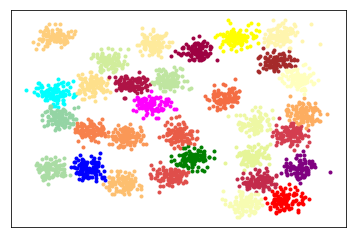

In [373]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta, not_outlier=True)

if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i, alpha, beta, not_outlier=True)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta, not_outlier=True)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Result without Evaluation: ", folder_name + '/' + identity_name + '-hdbscan-without-outliers')

In [374]:
alpha = 1
beta = 0

In [375]:
import operator
import math

In [376]:
#Update Nearest Neighbor Evaluation Values By Applying Distance based on 3*Sigma + Mean
def getUpdatedEvaluation(dataset, clusters_labels, dataset_neighbors, clusters_centroids, c_k_o_i, features_set):
    
    clusters_labels = np.unique(dataset[label_col_name])        
    
    count_fringe = 0
    for index, o_c in dataset.iterrows():
        total_distance = 0
        for i in range(num_neighbors):
            distance = 0
            neighbor_index = dataset_neighbors[index][i]
            neighbor_obj = dataset.iloc[neighbor_index]

            for col in features_set:
                if col != label_col_name:
                    distance += (neighbor_obj[col] - o_c[col])**2

            distance = math.sqrt(distance)
            total_distance += distance 


        neighbor_average = total_distance/num_neighbors
        cluster_label = dataset.iloc[index]['L']
        cluster_average = clusters_centroids[cluster_label][1]
        cluster_average_average = clusters_centroids[cluster_label][2]
        cluster_average_std = clusters_centroids[cluster_label][3]
        
        #print("neighbor_average: ",neighbor_average)
        #print("cluster_average_average: ", cluster_average_average)
        #print("cluster_average: ", cluster_average)
        #if (sigma_multiples*neighbor_average) > cluster_average:
        #print("1: ", neighbor_average)
        #print(sigma_multiples*cluster_average_std + cluster_average_average)
        #print("cluster_average_std: ", cluster_average_std)
        
        #Code to set evaluation value score based on 3*Sigma + Mean rule
        if (neighbor_average) > (sigma_multiples*cluster_average_std + cluster_average_average):
            #print("sigma_multiples*cluster_average_std + cluster_average_average: ", sigma_multiples*cluster_average_std + cluster_average_average)
            count_fringe += 1
            cluster_label = dataset.iloc[index]['L']
            #c_k_o_i_min_inside[index][int(cluster_label)] = 0
            c_k_o_i[index][int(cluster_label)] = (sigma_multiples*cluster_average_std + cluster_average_average)/neighbor_average
    
    #print(count_fringe)
    return c_k_o_i


In [377]:
#print(c_k_o_i)

In [378]:
#c_k_o_i = getUpdatedEvaluation(sampled_df, clusters_labels, row_neighbors_list, clusters_centroids, c_k_o_i, features)
if select_df_test_flag:
    c_k_o_i = getUpdatedEvaluation(sampled_df[sampled_df['Out'] == 1], clusters_labels, row_neighbors_list, clusters_centroids, c_k_o_i, features)
else:
    c_k_o_i = getUpdatedEvaluation(sampled_df, clusters_labels, row_neighbors_list, clusters_centroids, c_k_o_i, features)


In [379]:
#print(c_k_o_i)

In [380]:
#Applying Spatial Filters to Get New Evalaution Values

def getUpdatedEvaluationValues(dataset, dataset_neighbors, label_col_name, c_k_o_i, features_set):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    c_k_o_i_mean = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_min = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_max = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_median = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_laplacian = np.zeros((len(dataset),len(clusters_labels)))
    
    #Considering only neighbors of point
    #neighbor_c_k_o_i = np.zeros(num_neighbors)

    #Considering neighbors of point as well as point itself
    neighbor_c_k_o_i = np.zeros(num_neighbors+1)
    
    for cluster_label in clusters_labels:
        for index in row_neighbors_list:
            total_distance= 0
            for i in range(num_neighbors):
                neighbor_index = row_neighbors_list[index][i]
                
                ####################
                distance = 0
                neighbor_obj = dataset.iloc[neighbor_index]
                o_c = dataset.iloc[index]
                
                for col in features_set:
                    if col != label_col_name:
                        distance += (neighbor_obj[col] - o_c[col])**2

                distance = math.sqrt(distance)
                
                average_distance = clusters_centroids[cluster_label][1]
                centroid_distance_std = clusters_centroids[cluster_label][4]
                
                cluster_average_average = clusters_centroids[cluster_label][2]
                cluster_average_std = clusters_centroids[cluster_label][3]
                
                #Code to consider only those neighbors which are in specific radius
                '''
                if distance > (sigma_multiples*cluster_average_std + cluster_average_average):
                    #print("distance", distance)
                    #print("cluster_average_std", cluster_average_std)
                    #print("cluster_average_average", cluster_average_average)
                    #print("3*sigma + Mean", sigma_multiples*cluster_average_std + cluster_average_average)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                '''
                #Code to consider only those neighbors which are in specific radius based on centroid distance
                
                '''
                if distance > (sigma_multiples*centroid_distance_std + average_distance):
                    print("distance", distance)
                    print("centroid_distance_std", centroid_distance_std)
                    print("average_distance", average_distance)
                    print("3*sigma + Mean", sigma_multiples*centroid_distance_std + average_distance)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                else:
                    neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                '''
                
                # Code not consider radius for neighbors
                neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                
                total_distance += distance

            #Considering neighbors of point as well as point itself
            neighbor_c_k_o_i[i+1] = c_k_o_i[index][int(cluster_label)]
            
            #neighbor_c_k_o_i = np.sort(neighbor_c_k_o_i)
            
            c_k_o_i_mean[index][int(cluster_label)] =  np.mean(neighbor_c_k_o_i)
            c_k_o_i_min[index][int(cluster_label)] =  np.nanmin(neighbor_c_k_o_i)
            c_k_o_i_max[index][int(cluster_label)] =  np.nanmax(neighbor_c_k_o_i)
            c_k_o_i_median[index][int(cluster_label)] =  np.median(neighbor_c_k_o_i)
            
            laplacian_value = np.sum(neighbor_c_k_o_i[0:num_neighbors]) - neighbor_c_k_o_i[num_neighbors]*(num_neighbors)
            c_k_o_i_laplacian[index][int(cluster_label)] = (laplacian_value-(-num_neighbors))/(num_neighbors-(-num_neighbors))
            
            #print(neighbor_c_k_o_i)
            #print("Mean", np.mean(neighbor_c_k_o_i))
            #print("Min", np.nanmin(neighbor_c_k_o_i))
            #print("Max", np.nanmax(neighbor_c_k_o_i))
            #print("Median", np.median(neighbor_c_k_o_i))
            #print("Laplacian", c_k_o_i_laplacian[index][int(cluster_label)])            
    
    return c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian

In [381]:
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i, features)
if select_df_test_flag:
    c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df[sampled_df['Out'] == 1], row_neighbors_list, label_col_name, c_k_o_i, features)
else:
    c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i, features)


In [382]:
write_to_file('../Files/sampled_df.csv', np.array(sampled_df))
write_to_file('../Files/c_k_o_i.csv', c_k_o_i)
write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)
write_to_file('../Files/c_k_o_i_min.csv', c_k_o_i_min)
write_to_file('../Files/c_k_o_i_max.csv', c_k_o_i_max)
write_to_file('../Files/c_k_o_i_median.csv', c_k_o_i_median)
write_to_file('../Files/c_k_o_i_laplacian.csv', c_k_o_i_laplacian)

In [383]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Normal Evaluation: ", folder_name + '/3-' + identity_name)

Total Inside:  2735
Total Outside:  0
Total Partial:  365


In [384]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_mean, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Mean Evaluation: ", folder_name + '/4-' + identity_name)

Total Inside:  2480
Total Outside:  0
Total Partial:  620


Total Inside:  2480
Total Outside:  40
Total Partial:  580


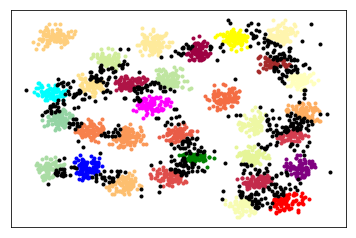

In [385]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_min, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Minimum Evaluation: ", folder_name + '/' + identity_name + '-minimum-result')

In [386]:
if select_df_test_flag:
    print(select_df_test_out.shape)
print(select_df.shape)
print(sampled_df.shape)

(3100, 2)
(3100, 3)


In [387]:
# Run this Code only if we have Test data in dataset i.e. sampled_df['Out']
def euclidean_distance(row1, row2, features_set):
    distance = 0.0
    for col in features_set:
        if col != label_col_name:
            distance += (row1[col] - row2[col])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(dataset_train, row, row_index, num_neighbors,final_inside):
    distances = list()
    neighbors = list()

    #Code used to count object itself as neighbour of its own
    #distances.append((row_index, row, 0))

    for index, row_dataset_train in dataset_train.iterrows():
        if tuple(row_dataset_train) in final_list:
            dist = euclidean_distance(row, row_dataset_train, features)
            #print(dist)
            distances.append((index, row_dataset_train, dist))

    distances.sort(key=lambda tup: tup[2])
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])        
    return neighbors


def get_testdata_neighbors_list(num_neighbors, final_inside):
    row_neighbors_list_test = {}
    # calculate the Euclidean distance between two vectors
    for index, row in select_df_test.iterrows():
        neighbors = get_neighbors(select_df, row, index, num_neighbors,final_inside)
        row_neighbors_list_test[index] = neighbors
    
    return row_neighbors_list_test


In [388]:
if select_df_test_flag:
    row_neighbors_list_test = get_testdata_neighbors_list(num_neighbors, final_inside)

In [389]:
# Neighborhood based Evaluation Function Score Calculations
if select_df_test_flag:
    c_k_o_i_test = getEvaluationValues(sampled_df, row_neighbors_list_test, label_col_name)
    

In [390]:
# Here we consider all outliers are at the end of the records,
# c_k_o_i_test size include train and test both evaluation, however, train evalation (c_k_o_i) 
# has only not-outliers dataset, so we want the to updated test evaluation c_k_o_i_test, where
# initial records shows normal records while last records shows outliers records.

if select_df_test_flag:
    for i in range(c_k_o_i.shape[0]):
        for j in range(c_k_o_i_test.shape[1]):
            c_k_o_i_test[i][j] = c_k_o_i[i][j]
        

In [391]:
c_k_o_i.shape[0]

3100

In [392]:
if select_df_test_flag:
    c_k_o_i_test.shape[0]

In [393]:
# Evaluation Function Score Updation based based on "Mean +/- Sigma * 3"
if select_df_test_flag:
    c_k_o_i_test = getUpdatedEvaluation(sampled_df, clusters_labels, row_neighbors_list_test, clusters_centroids, c_k_o_i_test, features, True)
    

In [394]:
if select_df_test_flag:
    print(c_k_o_i_test.shape)
#print(c_k_o_i_test[c_k_o_i_test > 0])

In [395]:
# Evaluation Function Score Updation based based on spatial Filtering

if select_df_test_flag:
    c_k_o_i_mean_test, c_k_o_i_min_test, c_k_o_i_max_test, c_k_o_i_median_test, c_k_o_i_laplacian_test = getUpdatedEvaluationValues(sampled_df, row_neighbors_list_test, label_col_name, c_k_o_i_test, features)
    

In [396]:
if select_df_test_flag:
    print(c_k_o_i_min_test.shape)
#print(c_k_o_i_min_test[c_k_o_i_min_test != 1])


In [397]:
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_min_test, alpha, beta)
    

In [398]:
#write_outliers_detected(final_inside,final_partial,final_outside, file_measures, 'Minimum')

In [399]:
#calculate_db_index(final_inside, clusters_labels, file_measures, 'Minimum')

In [400]:
#calculate_silhouette_score(final_inside, clusters_labels, file_measures, 'Minimum')

In [401]:
#calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures, 'Minimum')

In [402]:
#calculate_confusion_matrix(final_inside, clusters_labels, sampled_df, file_measures, 'Minimum')

Total Inside:  2480
Total Outside:  0
Total Partial:  620


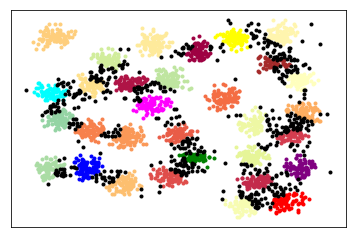

In [403]:
#Blurring = Mean
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_mean, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Blurred Evaluation: ", folder_name + '/' + identity_name + '-blurred-result')


In [404]:
write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)

In [405]:
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean_test, alpha, beta)


In [406]:
if select_df_test_flag:        
    print("Blurring and Sharpening based three-way Clustering (BS3WC): ")
    n_count = 0
    outliers_count = 0

    test_range = sampled_df.shape[0] - select_df_test.shape[0]
    test_range_out = sampled_df.shape[0] - select_df_test_out.shape[0]
    n_count = select_df_test_out.shape[0]

    TP = 0 
    FP = 0
    FN = 0
    TN = 0

    for i in range(test_range, sampled_df.shape[0]):
        if i in outliers_indices and i >= test_range_out:
            TP += 1
        elif i not in outliers_indices and i >= test_range_out:
            FN += 1
        elif i in outliers_indices and i < test_range_out:
            FP += 1
        elif i not in outliers_indices and i < test_range_out:
            TN += 1

    print("TP    |    FP    |    FN    |    TN")
    print(TP, ",      ", FP, ",     ", FN, ",      ", TN)

In [407]:
write_outliers_detected(final_inside,final_partial,final_outside, file_measures, 'Blur')

In [408]:
calculate_db_index(final_inside, clusters_labels, file_measures, 'Blur')

DB Index Score (Blur): 0.4402



In [409]:
calculate_silhouette_score(final_inside, clusters_labels, file_measures, 'Blur')

Silhouette Coefficient (Blur): 0.6651


In [410]:
calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures, 'Blur')

Accuracy Score (Blur): 1.0000


In [411]:
calculate_NMI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

Normalized Mutual Information (Blur): 1.0000


In [412]:
calculate_ARI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

Adjusted Random Index (Blur): 1.0000


Total Inside:  2480


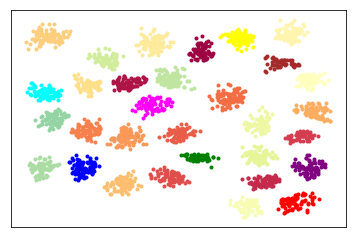

In [413]:
c_k_o_i_inside = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        if c_k_o_i_mean[i][j] == 1:
            c_k_o_i_inside[i][j] = 1

alpha = 1
clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_inside, alpha)
print("Total Inside: ",  len(c_k_o_i_inside[c_k_o_i_inside == 1]))

#final_inside.append((4,6))
#clusters_labels[(4,6)] = 1

plot_custom_clusters(final_inside, clusters_labels, 5, colors, "Blurr (Inside) Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))

In [414]:
c_k_o_i_diff = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        c_k_o_i_diff[i][j] = c_k_o_i[i][j] - c_k_o_i_mean[i][j]

Total Inside:  2739
Total Outside:  0
Total Partial:  361


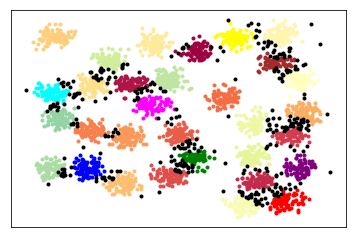

In [415]:
#Sharp Image = Original + Difference
c_k_o_i_sharp = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        c_k_o_i_sharp[i][j] = c_k_o_i[i][j] + c_k_o_i_diff[i][j]

#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_sharp, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Sharpe Evaluation: ", folder_name + '/' + identity_name + '-sharpe-result')


Total Inside:  2739


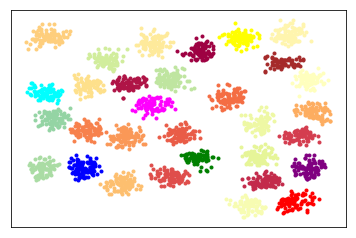

In [416]:
c_k_o_i_inside = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        if c_k_o_i_sharp[i][j] >= 1:
            c_k_o_i_inside[i][j] = 1

alpha = 1
clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_inside, alpha)
print("Total Inside: ",  len(c_k_o_i_inside[c_k_o_i_inside == 1]))

#final_inside.append((4,6))
#clusters_labels[(4,6)] = 1

plot_custom_clusters(final_inside, clusters_labels, 5, colors, "Sharpe (Inside) Plot: ", folder_name + '/' + identity_name + '-sharpe-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))

In [417]:
if select_df_test_flag:        
    c_k_o_i_diff_test = np.zeros((sampled_df.shape[0],sampled_df.shape[1]))
    for i in range(c_k_o_i_test.shape[0]):
        for j in range(c_k_o_i_test.shape[1]):
            if c_k_o_i_test < c_k_o_i.shape[0]:
                c_k_o_i_diff_test[i][j] = c_k_o_i[i][j] - c_k_o_i_mean[i][j]
            else:
                c_k_o_i_diff_test[i][j] = c_k_o_i_test[i][j] - c_k_o_i_mean_test[i][j]

    c_k_o_i_sharp_test = np.zeros((sampled_df.shape[0],sampled_df.shape[1]))
    for i in range(c_k_o_i_test.shape[0]):
        for j in range(c_k_o_i_test.shape[1]):
            if c_k_o_i_test < c_k_o_i.shape[0]:
                c_k_o_i_sharp_test[i][j] = c_k_o_i[i][j] + c_k_o_i_diff[i][j]
            else:
                 c_k_o_i_sharp_test[i][j] = c_k_o_i_test[i][j] + c_k_o_i_diff_test[i][j]   

    if select_df_test_flag:
        clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp_test, alpha, beta)



In [418]:
if select_df_test_flag:        
    print("Blurring and Sharpening based three-way Clustering (BS3WC): ")
    n_count = 0
    outliers_count = 0

    test_range = sampled_df.shape[0] - select_df_test.shape[0]
    test_range_out = sampled_df.shape[0] - select_df_test_out.shape[0]
    n_count = select_df_test_out.shape[0]

    TP = 0 
    FP = 0
    FN = 0
    TN = 0

    for i in range(test_range, sampled_df.shape[0]):
        if i in outliers_indices and i >= test_range_out:
            TP += 1
        elif i not in outliers_indices and i >= test_range_out:
            FN += 1
        elif i in outliers_indices and i < test_range_out:
            FP += 1
        elif i not in outliers_indices and i < test_range_out:
            TN += 1

    print("TP    |    FP    |    FN    |    TN")
    print(TP, ",      ", FP, ",     ", FN, ",      ", TN)

In [419]:
write_outliers_detected(final_inside,final_partial,final_outside, file_measures, 'Sharpe')

In [420]:
calculate_db_index(final_inside, clusters_labels, file_measures, 'Sharpe')

DB Index Score (Sharpe): 0.4786



In [421]:
calculate_silhouette_score(final_inside, clusters_labels, file_measures, 'Sharpe')

Silhouette Coefficient (Sharpe): 0.6346


In [422]:
calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures, 'Sharpe')

Accuracy Score (Sharpe): 1.0000


In [423]:
calculate_NMI(final_inside, clusters_labels, ground_truth, file_measures, 'Sharpe')

Normalized Mutual Information (Sharpe): 1.0000


In [424]:
calculate_ARI(final_inside, clusters_labels, ground_truth, file_measures, 'Sharpe')

Adjusted Random Index (Sharpe): 1.0000


In [425]:
# Pythono3 code to rename multiple files in a directory or folder 
# importing os module 
import os 
path = "/home/baharali/PhD-Image-Conversions/2. BS3WC/images/"
for count, filename_old in enumerate(os.listdir(path)): 
    #dst ="Hostel" + str(count) + ".jpg"
    if 'txt' in filename_old:
        src = path + filename_old 
        dst = path + filename_old.replace('-txt','') 
        os.rename(src, dst) 
        #print(src)
        #print(dst)
        